## Improving Random Forest Model 
**from Temperature_Prediction1 file** 

## 3 Approaches to making Better ML Model
**1. More High Quality Data**

**2. Hyperparameter tuning of algorithm**

**3. Try different algorithm**

In [1]:
## In this notebook we will go through approach 1.

##The code below recreates the simple random forest model written up in my 
##article on Medium. We use the default parameters except for increasing the 
##number of decision trees (n_estimators) to 1000. The original model achieves 
##a mean average error of 3.87 degrees and an accuracy of 93.93%.

In [2]:
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

# The baseline predictions are the historical averages
baseline_preds = original_test_features[:, original_feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - original_test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculate the absolute errors
errors = abs(predictions - original_test_labels)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Average baseline error:  5.06 degrees.
Average model error: 3.87 degrees.
Improvement over baseline: 23.45 %.
Accuracy: 93.93 %.


## Collect more Data
**This time we will use 6 years of historical data and include some additional variables to augment the temperature features used in the simple model**

In [3]:
import pandas as pd

features = pd.read_csv('temps_extended.txt')
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [4]:
print('We have {} days of data with {} variables.'.format(*features.shape))

We have 2191 days of data with 12 variables.


## Numerical and Visual Inspection of Data

In [5]:
round(features.describe(),2)

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2013.50,6.52,15.71,7.37,0.12,0.01,61.17,61.18,60.29,61.18,60.31
std,1.71,3.45,8.80,3.15,0.25,0.15,13.09,13.08,10.73,13.08,15.87
min,2011.00,1.00,1.00,0.89,0.00,0.00,29.00,29.00,45.10,29.00,25.00
25%,2012.00,4.00,8.00,5.14,0.00,0.00,51.00,51.00,50.10,51.00,49.00
50%,2014.00,7.00,16.00,6.71,0.00,0.00,60.00,60.00,58.80,60.00,60.00
75%,2015.00,10.00,23.00,9.17,0.12,0.00,71.00,71.00,70.20,71.00,71.00
max,2017.00,12.00,31.00,21.25,2.20,3.00,96.00,96.00,77.40,96.00,97.00


In [6]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

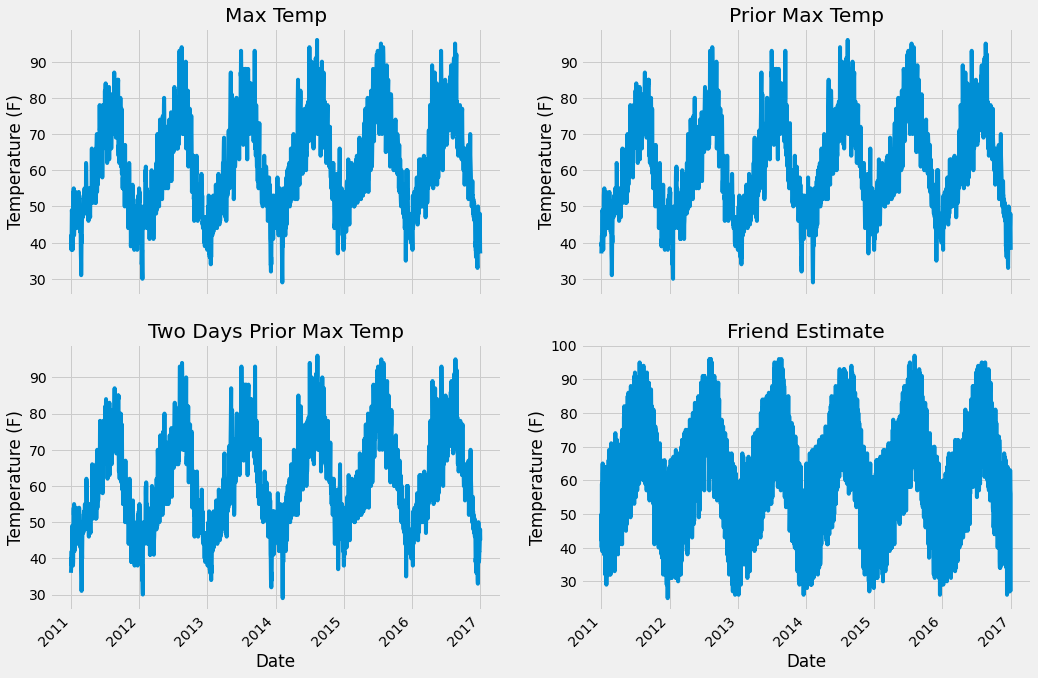

In [7]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

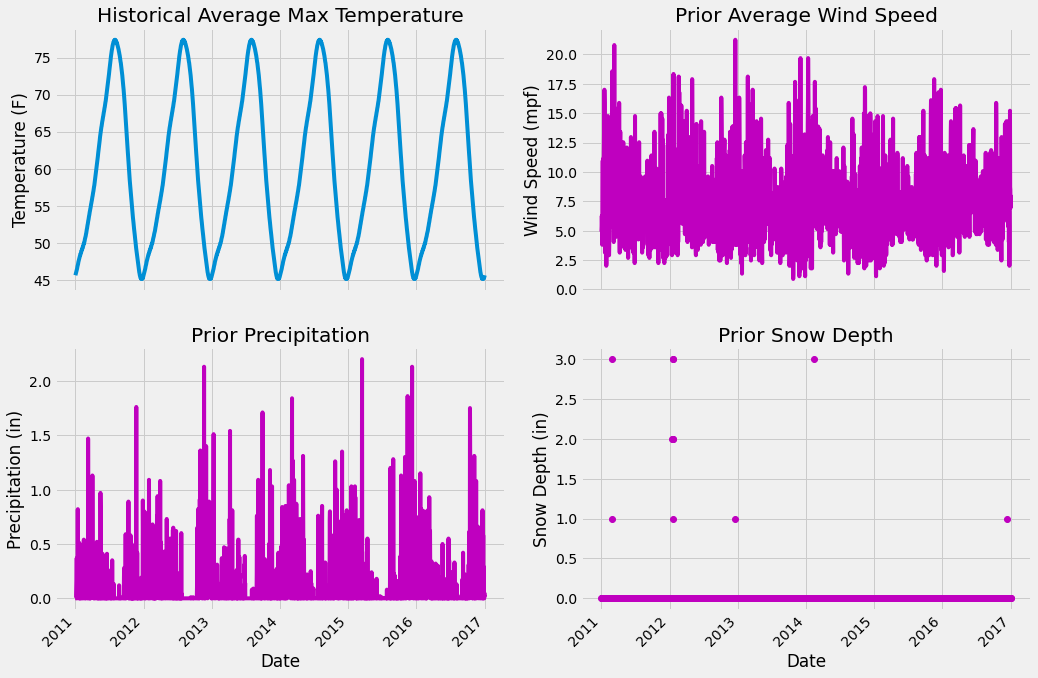

In [8]:
##Set up plotting layout
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig.autofmt_xdate(rotation=45)

##Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Average Max Temperature')

##Prior Average Wind Speed
ax2.plot(dates, features['ws_1'], 'm-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mpf)'); ax2.set_title('Prior Average Wind Speed')

##Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'm-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

##Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'mo')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

## Pairplot
Pairplot is a graph which shows all the relationships between variables in a dataset. We can do this with the seaborn library and examine the plots to see which variables are highly correlated. We would suspect those that are more correlated with max temperature would be more useful for prediction.

In [9]:
## Create columns of seasons for pair plotting colors
seasons = []

for month in features['month']:
    if month in [1,2,12]:
        seasons.append('winter')
    elif month in [3,4,5]:
        seasons.append('spring')
    elif month in [6,7,8]:
        seasons.append('summer')
    elif month in [9,10,11]:
        seasons.append('fall')
        
##Will only use 6 variables for plotting pairs
reduced_features = features[['temp_1','prcp_1','average','actual']]
reduced_features['season'] = seasons

<ipython-input-9-a3dd1cacea5b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_features['season'] = seasons


## Seaborn

F:\ancnd\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


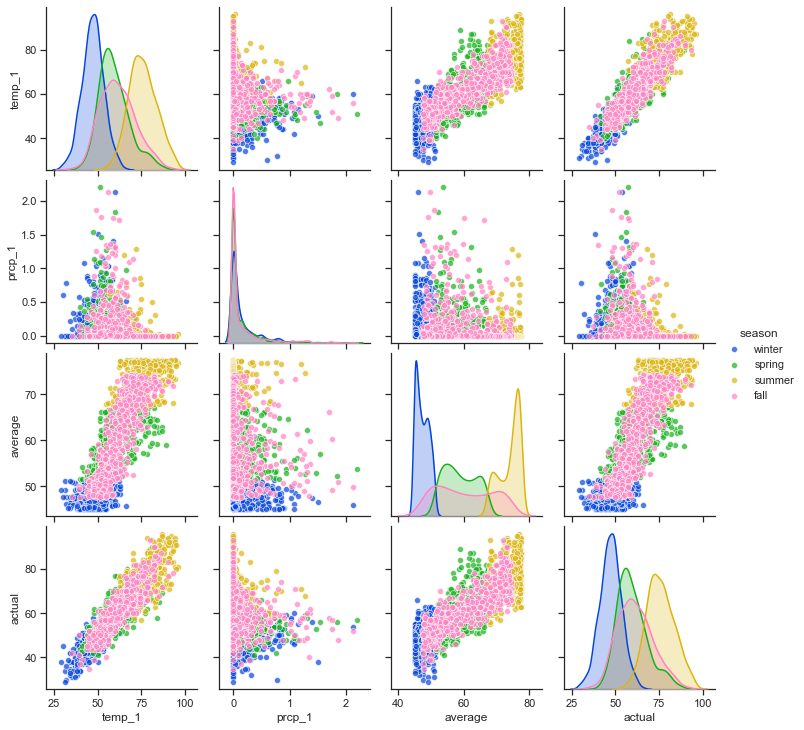

In [10]:
##Pairplot using SEABORN
import seaborn as sns

sns.set(style='ticks',color_codes=True);

##create custom color palete
palette = sns.xkcd_palette(['blue','green','gold','pink'])

##Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

## Data Preparation

In [11]:
##One Hot Encoding
features = pd.get_dummies(features)

##Ectract features and labels
labels = features['actual']
features = features.drop('actual', axis=1)

##List of features for later use
feature_list = list(features.columns)

##Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

##Training and Testing sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)


## Establish New Baseline
The new baseline will be the predictions of the model trained on only one year of data but tested on the expanded testing set. In order to make predictions, we will need to restrict the features to those in the original one year of data (exclude the wind speed, precipitation, and snow depth). Testing with the same test set allows us to assess the effect of using additional training data.

In [13]:
##Find original feature indices
original_feature_indices = [feature_list.index(feature) for feature in feature_list if feature not in ['ws_10','prcp_1','snwd_1']]

##Create test set of the original features
original_test_features = test_features[:, original_feature_indices]